<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Дубликаты-в-данных" data-toc-modified-id="Дубликаты-в-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Дубликаты в данных</a></span></li><li><span><a href="#Пропуски-в-данных" data-toc-modified-id="Пропуски-в-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Пропуски в данных</a></span></li><li><span><a href="#Выбросы-в-данных" data-toc-modified-id="Выбросы-в-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выбросы в данных</a></span></li><li><span><a href="#Преобразование-данных" data-toc-modified-id="Преобразование-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Преобразование данных</a></span></li><li><span><a href="#Разбивка-данных-на-тренировочные,-валидационные-и-тестовые" data-toc-modified-id="Разбивка-данных-на-тренировочные,-валидационные-и-тестовые-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Разбивка данных на тренировочные, валидационные и тестовые</a></span></li><li><span><a href="#Кодирование-данных" data-toc-modified-id="Кодирование-данных-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Кодирование данных</a></span></li><li><span><a href="#Масштабирование-признаков---стандартизация-данных" data-toc-modified-id="Масштабирование-признаков---стандартизация-данных-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Масштабирование признаков - стандартизация данных</a></span></li><li><span><a href="#Определение-значимости-признаков---матрица-корреляций" data-toc-modified-id="Определение-значимости-признаков---матрица-корреляций-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Определение значимости признаков - матрица корреляций</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-CatBoost" data-toc-modified-id="Модель-CatBoost-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель CatBoost</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель случайного леса</a></span></li><li><span><a href="#Модель-LightGBM" data-toc-modified-id="Модель-LightGBM-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель LightGBM</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-подготовке-данных" data-toc-modified-id="Выводы-по-подготовке-данных-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы по подготовке данных</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Нам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

Описание данных
Данные находятся в файле /autos.csv.

Признаки:

• Brand — марка автомобиля
• Model — модель автомобиля
• RegistrationYear — год регистрации автомобиля
• RegistrationMonth — месяц регистрации автомобиля
• Kilometer — пробег (км)
• Power — мощность (л. с.)

• VehicleType — тип автомобильного кузова
• Gearbox — тип коробки передач
• FuelType — тип топлива
• Repaired — была машина в ремонте или нет

• NumberOfPictures — количество фотографий автомобиля
• LastSeen — дата последней активности пользователя

• DateCreated — дата создания анкеты
• PostalCode — почтовый индекс владельца анкеты (пользователя)
• DateCrawled — дата скачивания анкеты из базы
Целевой признак Price — цена (евро)

## Подготовка данных

In [1]:
# загрузим необходимые библиотеки
import pandas as pd
import os

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [7]:
# Ядро барахлит, поэтому заккомитил 
# pip install pandas_profiling

In [8]:
# Ядро барахлит, поэтому заккомитил То работает, то неработает. К сожалению не могу больше тярять время.
# загрузим дополнительные библиотеки для EDA
# import sweetviz as sv
# import pandas_profiling

In [9]:
# скачаем файл
path_1 = 'autos.csv'
path_2 = '/datasets/autos.csv'

if os.path.exists(path_1):
    data = pd.read_csv(path_1)
elif os.path.exists(path_2):
    data = pd.read_csv(path_2)
else:
    print('Something is wrong')

In [123]:
# смотрим размер файла
data.shape

(354369, 16)

In [10]:
# возьмем последовательность полей в более удобном виде
data = data[['Brand', 'Model', 'RegistrationYear', 'RegistrationMonth', 'Kilometer', 'Power', 
 'VehicleType', 'Gearbox', 'FuelType', 'Repaired', 
 'NumberOfPictures', 'LastSeen',
 'DateCreated', 'PostalCode', 'DateCrawled', 'Price']]


In [125]:
# информация о файле 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Brand              354369 non-null  object
 1   Model              334664 non-null  object
 2   RegistrationYear   354369 non-null  int64 
 3   RegistrationMonth  354369 non-null  int64 
 4   Kilometer          354369 non-null  int64 
 5   Power              354369 non-null  int64 
 6   VehicleType        316879 non-null  object
 7   Gearbox            334536 non-null  object
 8   FuelType           321474 non-null  object
 9   Repaired           283215 non-null  object
 10  NumberOfPictures   354369 non-null  int64 
 11  LastSeen           354369 non-null  object
 12  DateCreated        354369 non-null  object
 13  PostalCode         354369 non-null  int64 
 14  DateCrawled        354369 non-null  object
 15  Price              354369 non-null  int64 
dtypes: int64(7), object(

In [126]:
# описание стандартных метрик критериев
data.describe()

,RegistrationYear,RegistrationMonth,Kilometer,Power,NumberOfPictures,PostalCode,Price
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000,354369.000000
mean,2004.234448,5.714645,128211.172535,110.094337,0.0,50508.689087,4416.656776
std,90.227958,3.726421,37905.341530,189.850405,0.0,25783.096248,4514.158514
min,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000,0.000000
25%,1999.000000,3.000000,125000.000000,69.000000,0.0,30165.000000,1050.000000
50%,2003.000000,6.000000,150000.000000,105.000000,0.0,49413.000000,2700.000000
75%,2008.000000,9.000000,150000.000000,143.000000,0.0,71083.000000,6400.000000
max,9999.000000,12.000000,150000.000000,20000.000000,0.0,99998.000000,20000.000000


В загруженных данных бросаются в глаза неадекватные минимальные и максимальные значения года регистрации, а также мощности автомобиля. Количество фото не заполнено. Средняя стоимость авто составляет 4416, медианное значение 2700.

In [127]:
# Ядро барахлит, поэтому заккомитил То работает, то неработает. К сожалению не могу больше тярять время.
# В любом случае во время обучения не злоупотреблять, чтобы руки не забыл как делать EDA анализ)
# разведочный анализ данных с помощью pandas_profiling
# pandas_profiling.ProfileReport(data)

### Дубликаты в данных

In [128]:
print('Количество дубликатов', data[data.duplicated()]['Brand'].count())

Количество дубликатов 4


In [11]:
# удалим дубликаты
data = data.drop_duplicates()

Дубликаты в данных удалены

### Пропуски в данных

In [130]:
# смотрим пропуски
data.isna().sum()

Brand                    0
Model                19705
RegistrationYear         0
RegistrationMonth        0
Kilometer                0
Power                    0
VehicleType          37490
Gearbox              19833
FuelType             32895
Repaired             71154
NumberOfPictures         0
LastSeen                 0
DateCreated              0
PostalCode               0
DateCrawled              0
Price                    0
dtype: int64

Обработаем пропуски для поля Model

In [12]:
# Заполним пустуе ячейки 
data['Model'] = data['Model'].fillna('unknow')

Обработаем пропуски для поля VehicleType

In [13]:
# смотрим уникальные значения
data['VehicleType'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

Из таблицы ниже видно, что у каждой модели может быть несколько типов кузова. Поэтому заполнить пропуски в типах кузова по бренду и модели не представляется возможным.

In [133]:
# Посмотрим как соотносится тип кузова с брендом и моделью
data[['Brand', 'Model', 'VehicleType', 'Price']].\
groupby(['Brand', 'Model', 'VehicleType'])\
.agg({'Price': ['count', 'min', 'mean', 'max']})

Price                           
                                count   min          mean    max
Brand      Model    VehicleType                                 
alfa_romeo 145      coupe           2   450    600.000000    750
                    other           1   500    500.000000    500
                    sedan          13     0   1440.692308   5000
                    small          19   150    798.473684   2200
           147      coupe          27     0   2161.037037   6750
...                               ...   ...           ...    ...
volvo      v70      coupe           1   500    500.000000    500
                    wagon         608     0   3996.909539  19999
           xc_reihe sedan           3  6500   6500.000000   6500
                    suv           216   414  12025.712963  19999
                    wagon          41   850  10166.463415  20000

[1665 rows x 4 columns]

In [14]:
# Заполним пустуе ячейки в поле VehicleType
data['VehicleType'] = data['VehicleType'].fillna('unknow')

Обработаем пропуски для поля Gearbox. Логика следующая - смотрим моедли только с одним типом коробки передач. Принимаем допущение, что исходные данные у нас достаточно полные, и если у модели один тип коробки передач, то и у пропущенных значений Gearbox, аналогиная каробка. Оставшиеся значения заполним unknow.

In [15]:
# смотрим уникальные значения для поля
data['Gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

In [16]:
# подготовим вспомогательную таблицу
gearbox_df = data[['Brand', 'Model', 'Gearbox', 'Price']].\
groupby(['Brand', 'Model', 'Gearbox']).\
agg({'Price' : ['count']}).reset_index()
gearbox_df.head(2)

,Brand,Model,Gearbox,Price
,,,,count
0,alfa_romeo,145,manual,40
1,alfa_romeo,147,auto,29


In [17]:
# подготовим вторую вспомогательную таблицу, с моделями где используется только один тип коробки передач
models_one_gearbox = gearbox_df.groupby(['Brand', 'Model', 'Gearbox']).agg({'Gearbox':['count']})\
[gearbox_df.groupby(['Brand', 'Model']).agg({'Gearbox':['count']})['Gearbox']['count'] == 1]

models_one_gearbox

/tmp/ipykernel_78/2802522539.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  models_one_gearbox = gearbox_df.groupby(['Brand', 'Model', 'Gearbox']).agg({'Gearbox':['count']})\


Gearbox
                                           count
Brand         Model              Gearbox        
alfa_romeo    145                manual        1
chevrolet     spark              manual        1
dacia         duster             manual        1
              lodgy              manual        1
              logan              manual        1
              other              manual        1
              unknow             manual        1
daewoo        matiz              manual        1
lada          kalina             manual        1
              niva               manual        1
              samara             manual        1
              unknow             manual        1
lancia        elefantino         manual        1
land_rover    range_rover_evoque auto          1
              serie_1            manual        1
              serie_2            manual        1
              serie_3            manual        1
mercedes_benz gl                 auto          1
mini          other              manual        1
rover         defender           manual        1
              discovery          manual        1
seat          other              manual        1
trabant       other              manual        1
              unknow             manual        1
volkswagen    fox                manual        1

In [18]:
# Заполним в цикле пропуски для найденных моделей 
for model in models_one_gearbox.index:
    data.loc[(data['Model'] == model[1])&(data['Gearbox'].isna()), 'Gearbox'] = model[2]

Удалось осознанно заполнить 5636 пропусков поля Gearbox. По аналогичным значениям модели.

In [19]:
# Остальные значения заполняем unknow
data['Gearbox'] = data['Gearbox'].fillna('unknow')

Обработаем пропуски для поля FuelType

In [140]:
# смотрим уникальные значения поля
data['FuelType'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

Считаю нужным посмотреть связь с моделями авто, т.к. могут быть некоторые модели только электрические, например, или может быть только дизельные

In [20]:
# подготовим вспомогательную таблицу
fuel_type_models = data[['Brand', 'Model', 'FuelType', 'Price']].\
groupby(['Brand', 'Model', 'FuelType']).count().reset_index()
fuel_type_models.head()

,Brand,Model,FuelType,Price
0,alfa_romeo,145,gasoline,1
1,alfa_romeo,145,petrol,43
2,alfa_romeo,147,gasoline,133
3,alfa_romeo,147,lpg,18
4,alfa_romeo,147,petrol,390


In [21]:
# переформатируем таблицу с моделями где используется только один тип топлива
fuel_type_models = fuel_type_models.groupby(['Brand', 'Model', 'FuelType']).agg({'FuelType':['count']})\
[fuel_type_models.groupby(['Brand', 'Model']).agg({'FuelType':['count']})['FuelType']['count'] == 1].reset_index()
fuel_type_models

/tmp/ipykernel_78/3274217518.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fuel_type_models = fuel_type_models.groupby(['Brand', 'Model', 'FuelType']).agg({'FuelType':['count']})\


Brand               Model  FuelType      
                                             count
0         audi                 200    petrol     1
1         audi                  90    petrol     1
2     daihatsu             charade    petrol     1
3     daihatsu             materia    petrol     1
4     daihatsu                move    petrol     1
5       jaguar              unknow    petrol     1
6       lancia          elefantino    petrol     1
7       lancia              unknow    petrol     1
8   land_rover  range_rover_evoque  gasoline     1
9         opel              kadett    petrol     1
10     porsche                 911    petrol     1
11     porsche             boxster    petrol     1
12     renault                 r19    petrol     1
13       rover            defender    petrol     1
14  volkswagen              amarok  gasoline     1

In [22]:
# Заполним в цикле пропуски для найденных моделей 
for model in fuel_type_models.values:
    data.loc[(data['Model'] == model[1]) & (data['FuelType'].isna()), 'FuelType'] = model[2]

Таким образом удалось заполнить 7 328 пустых ячеек поля FuelType. Остальные ячейки заполняем unknow

In [23]:
# Оставшиеся пустые ячейки поля FuelType ячейки заполняем unknow
data['FuelType'] = data['FuelType'].fillna('unknow')

Обработаем пропуски для поля Repaired — была машина в ремонте или нет

In [145]:
data['Repaired'].unique()

array([nan, 'yes', 'no'], dtype=object)

Можно предположить, что машина не была в ремонте при отсутствие данных об этом

In [24]:
data['Repaired'] = data['Repaired'].fillna('no')

In [25]:
# проверяем результат обработки пропусков
data.isna().sum()

Brand                0
Model                0
RegistrationYear     0
RegistrationMonth    0
Kilometer            0
Power                0
VehicleType          0
Gearbox              0
FuelType             0
Repaired             0
NumberOfPictures     0
LastSeen             0
DateCreated          0
PostalCode           0
DateCrawled          0
Price                0
dtype: int64

Пропуски во всех полях заполнены

### Выбросы в данных

Выбросы в поле RegistrationYear

In [148]:
data[['RegistrationYear']].describe()

,RegistrationYear
count,354365.000000
mean,2004.234481
std,90.228466
min,1000.000000
25%,1999.000000
50%,2003.000000
75%,2008.000000
max,9999.000000


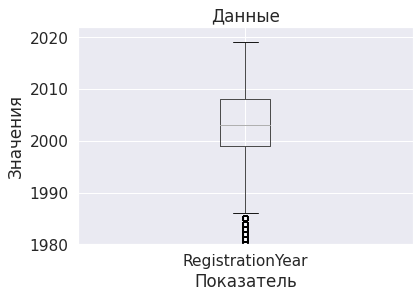

In [149]:
# визуализируем данные 
plt.title('Данные')
data[['RegistrationYear']].boxplot()
plt.ylim(1980,2022)
plt.ylabel('Значения')
plt.xlabel('Показатель')
plt.show()

In [150]:
z = (data[(data['RegistrationYear']<1950)|(data['RegistrationYear']>2022)]).shape[0]
print(f'Количество строк с выбросами в поле год регистрации {z}. Удалим эти строки, т.к. год выпуска имеет значимую важность при влиянии на цену автомобиля конкретной марки')

Количество строк с выбросами в поле год регистрации 351. Удалим эти строки, т.к. год выпуска имеет значимую важность при влиянии на цену автомобиля конкретной марки


In [26]:
# удалим строки с выбросами в поле RegistrationYear
data = data[(data['RegistrationYear']>1950)&(data['RegistrationYear']<2022)]

Выбросы в поле RegistrationMonth

In [152]:
sorted(data['RegistrationMonth'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

В поле RegistrationMonth нет выбросов

In [27]:
def data_boxplot(data, size, title_name, y_lim=None, x_label='Признак', y_label='Значение'):

    """Метод ящик с усами"""
    if y_lim is None:
        plt.figure(figsize=size)
        data.boxplot()
        plt.title(title_name)

    else:
        plt.figure(figsize=size)
        data.boxplot()
        plt.title(title_name)
        plt.ylim(y_lim)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show

In [28]:
def data_hist(data, size, title_name, bins=20, x_label='Значения', y_label='Количество'):

    """Метод Гисторамма"""
    plt.figure(figsize=size)
    plt.hist(data, bins=bins)
    plt.title(title_name)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim()
    plt.show

Выбросы в поле Kilometer

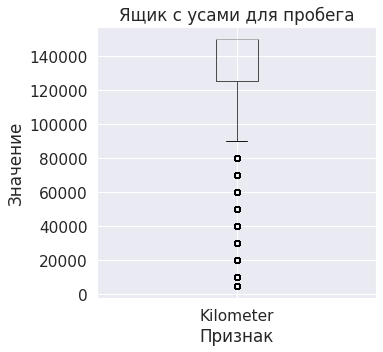

In [155]:
# Ящик с усами для пробега - выбросов не обнаружено, только редкие значения, но они допустимы
size = (5,5)
title_name = 'Ящик с усами для пробега'

data_boxplot(
    data[['Kilometer']],
    size, title_name
    )

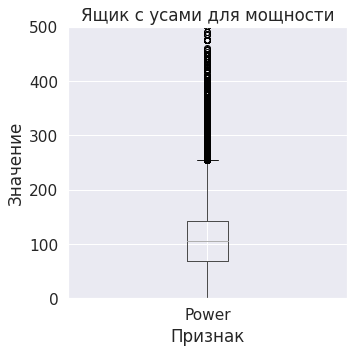

In [156]:
# Ящик с усами для мощности 
size = (5,5)
title_name = 'Ящик с усами для мощности'
ylimit = (0, 500)

data_boxplot(
    data[['Power']],
    size, title_name, ylimit
    )

In [157]:
# смотрим описание данных Power
data[['Power']].describe()

,Power
count,353996.000000
mean,110.122499
std,189.562444
min,0.000000
25%,69.000000
50%,105.000000
75%,143.000000
max,20000.000000


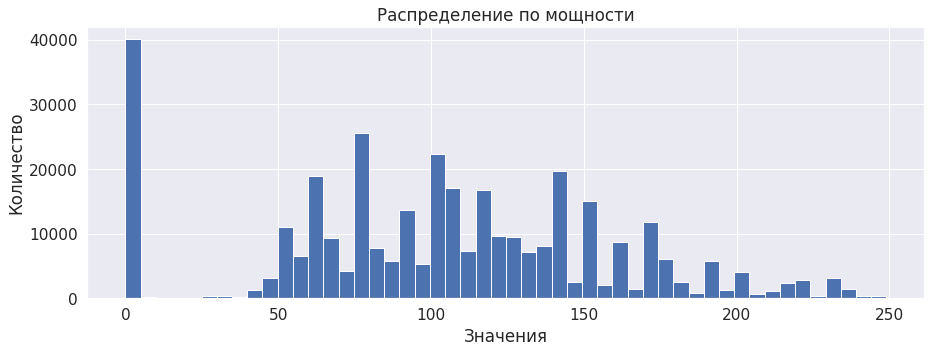

In [158]:
# Посмотрим на распределение значений 
size = (15, 5)
title_name = 'Распределение по мощности'
bins = 50

data_hist(
    data['Power'][(data['Power'] < 250)],
    size,
    title_name,
    bins
    )

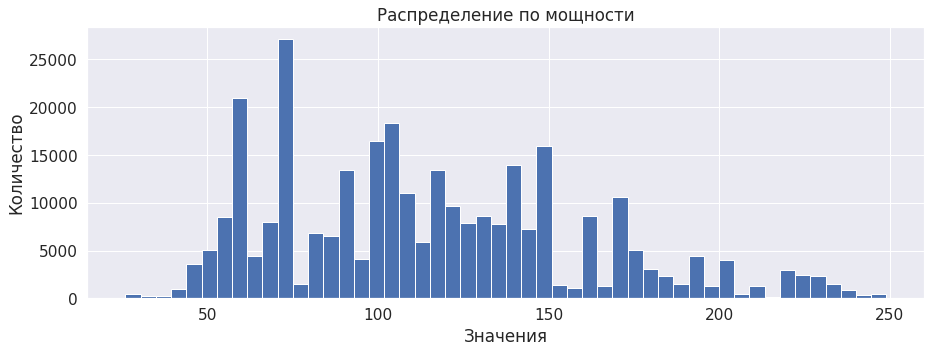

In [159]:
# Посмотрим на распределение значений 
size = (15, 5)
title_name = 'Распределение по мощности'
bins = 50

data_hist(
    data['Power'][(data['Power'] > 25) & (data['Power'] < 250)],
    size,
    title_name,
    bins
    )

In [160]:
# посмотрим количество выбросов Power
len(data[['Power']][(data['Power'] < 25) | (data['Power'] > 250)])

47895

In [29]:
# удалим выбросы Power
data = data[(data['Power'] > 25) & (data['Power'] < 250)]


In [162]:
# посмотрим уникальные значения количества фотографий
data['NumberOfPictures'].unique()

array([0])

Странно, но количество фото у всех авто = 0. Абсолютно бесполезное поле. Удалим его

In [30]:
data = data.drop('NumberOfPictures', axis=1)

In [164]:
# посмотрим значения в поле DateCreated
sorted(data['DateCreated'].unique())

['2015-03-20 00:00:00',
 '2015-08-07 00:00:00',
 '2015-08-10 00:00:00',
 '2015-09-04 00:00:00',
 '2015-09-09 00:00:00',
 '2015-11-02 00:00:00',
 '2015-11-08 00:00:00',
 '2015-11-10 00:00:00',
 '2015-11-12 00:00:00',
 '2015-11-17 00:00:00',
 '2015-11-23 00:00:00',
 '2015-11-24 00:00:00',
 '2015-12-05 00:00:00',
 '2015-12-06 00:00:00',
 '2015-12-17 00:00:00',
 '2015-12-30 00:00:00',
 '2016-01-02 00:00:00',
 '2016-01-06 00:00:00',
 '2016-01-07 00:00:00',
 '2016-01-08 00:00:00',
 '2016-01-10 00:00:00',
 '2016-01-13 00:00:00',
 '2016-01-15 00:00:00',
 '2016-01-16 00:00:00',
 '2016-01-17 00:00:00',
 '2016-01-18 00:00:00',
 '2016-01-19 00:00:00',
 '2016-01-20 00:00:00',
 '2016-01-22 00:00:00',
 '2016-01-23 00:00:00',
 '2016-01-24 00:00:00',
 '2016-01-25 00:00:00',
 '2016-01-26 00:00:00',
 '2016-01-27 00:00:00',
 '2016-01-28 00:00:00',
 '2016-01-29 00:00:00',
 '2016-01-30 00:00:00',
 '2016-01-31 00:00:00',
 '2016-02-01 00:00:00',
 '2016-02-02 00:00:00',
 '2016-02-03 00:00:00',
 '2016-02-04 00:

Неадекватных значений в поле DateCreated не обнаружено

Поля LastSeen, PostalCode, DateCrawled не имеют отношения к стоимости. Удалим их.

In [31]:
data = data.drop(['LastSeen', 'PostalCode', 'DateCrawled'], axis=1)

Выбросы в данных обработаны

### Преобразование данных

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305306 entries, 1 to 354368
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Brand              305306 non-null  object
 1   Model              305306 non-null  object
 2   RegistrationYear   305306 non-null  int64 
 3   RegistrationMonth  305306 non-null  int64 
 4   Kilometer          305306 non-null  int64 
 5   Power              305306 non-null  int64 
 6   VehicleType        305306 non-null  object
 7   Gearbox            305306 non-null  object
 8   FuelType           305306 non-null  object
 9   Repaired           305306 non-null  object
 10  DateCreated        305306 non-null  object
 11  Price              305306 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 30.3+ MB


In [167]:
# преобразуем DateCreated в нужный тип
# data['DateCreated'] = data['DateCreated'].astype('datetime64')

In [168]:
# оставим только месяц, дни и часы нам особо не нужны
# data['DateCreated'] = data['DateCreated'].dt.to_period('m')


2) У нас разный возраст машин. Есть гипотеза, что для разных возрастов - своё ценообразование. Поэтому, можно попробовать ввести фактор "тип возраста" (ретро, супер-ретро, старая, новая... надо подумать..)..

In [169]:
sorted(data['RegistrationYear'].unique())

[1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [41]:
def type_of_age(data):
    data.loc[data['RegistrationYear'] <= 1970, 'type_of_age'] = 'super_retro'
    data.loc[(data['RegistrationYear'] > 1970) & (data['RegistrationYear'] <= 1990), 'type_of_age'] = 'retro'
    data.loc[(data['RegistrationYear'] > 1990) & (data['RegistrationYear'] <= 2010), 'type_of_age'] = 'old'
    data.loc[(data['RegistrationYear'] > 2010) & (data['RegistrationYear'] <= 2016), 'type_of_age'] = 'normal'
    data.loc[(data['RegistrationYear'] > 2016), 'type_of_age'] = 'new'
    return

In [42]:
# создадим новое поле
data['type_of_age'] = 0

In [43]:
# присвоим котегории по возрасту автомомбиля
type_of_age(data)

In [44]:
# посмотрим что получилось
sorted(data['type_of_age'].unique())

['new', 'normal', 'old', 'retro', 'super_retro']

### Разбивка данных на тренировочные, валидационные и тестовые

In [32]:
def t_t_s(df):
    # Зададим целевой признак
    target = df['Price']
    # подготовим данные 
    features = df.drop('Price', axis = 1)
    # разобъём данные по соотношению 6:4
    features_train, features_valid, target_train, target_valid = \
        train_test_split(features, target, test_size=0.4, random_state=12345)
    # разобъем вторую часть данных ещё пополам
    features_valid, features_test, target_valid, target_test = \
        train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)
    return features_train, features_valid, features_test, target_train, target_valid, target_test

In [45]:
data_features_train, data_features_valid, data_features_test, data_target_train, data_target_valid, data_target_test = \
    t_t_s(data)

### Кодирование данных

Для преобразования данных выберем методику Порядкового кодирования Original Encoding, т.к. планируем дальнейщую работу с моделями основанную на деревьях - дерево решений, случайный лес, градиентный бустинг. Если бы мы работали с линейными моделями можно было бы применить прямое кодирование One Hot Encoding. Но это былобы не удобно, т.к. после преобразования получили бы несколько десятков полей.

In [63]:
# Загрузим нужную библиотеку
from sklearn.preprocessing import OrdinalEncoder

In [64]:
# создаем нужный объект этой структуры данных. Добавил гиперпараметры для модели кодирования
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [65]:
# обучение Encoder правильно обучать на тренировочной выборке.
encoder.fit(data_features_train)

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [66]:
# преобразуем данные функцией transform()
encod_features_train = encoder.transform(data_features_train)

In [67]:
# преобразуем данные функцией transform()
encod_features_valid = encoder.transform(data_features_valid)

In [68]:
# преобразуем данные функцией transform()
encod_features_test = encoder.transform(data_features_test)

In [69]:
# реализуем обновленный датафрейм. Тип данных int
encod_features_train = pd.DataFrame(encod_features_train, columns = data_features_train.columns, dtype=int)

In [70]:
# реализуем обновленный датафрейм. Тип данных int
encod_features_valid = pd.DataFrame(encod_features_valid, columns = data_features_train.columns, dtype=int)

In [71]:
# реализуем обновленный датафрейм. Тип данных int
encod_features_test = pd.DataFrame(encod_features_test, columns = data_features_train.columns, dtype=int)

In [72]:
# посмотрим что получилось
encod_features_train.head(3)

,Brand,Model,RegistrationYear,RegistrationMonth,Kilometer,Power,VehicleType,Gearbox,FuelType,Repaired,DateCreated,type_of_age
0,2,11,54,0,12,124,7,0,2,0,89,2
1,25,8,51,9,12,34,5,1,6,0,84,2
2,19,17,50,5,12,89,4,1,6,0,90,2


In [73]:
# посмотрим что получилось
encod_features_test.head(2)

,Brand,Model,RegistrationYear,RegistrationMonth,Kilometer,Power,VehicleType,Gearbox,FuelType,Repaired,DateCreated,type_of_age
0,25,8,61,7,5,47,5,1,6,1,89,1
1,21,165,58,6,5,49,5,1,6,0,80,2


### Масштабирование признаков - стандартизация данных

In [74]:
# Загрузим библиотеку
from sklearn.preprocessing import StandardScaler

In [75]:
# создадим объект
scaler = StandardScaler()
# обучение
scaler.fit(encod_features_train)

StandardScaler()

In [117]:
# стандартизируем данные
scale_features_train = scaler.transform(encod_features_train)

In [118]:
# реализуем обновленный датафрейм. Тип данных int
scale_features_train = pd.DataFrame(scale_features_train, columns = encod_features_train.columns)

In [121]:
scale_features_train.head(2)

,Brand,Model,RegistrationYear,RegistrationMonth,Kilometer,Power,VehicleType,Gearbox,FuelType,Repaired,DateCreated,type_of_age
0,-1.420809,-1.403288,0.248716,-1.639771,0.507738,0.764114,0.966667,-2.018861,-1.511551,-0.332136,0.99048,0.274161
1,0.302329,-1.444549,-0.186362,0.851014,0.507738,-1.234114,0.136437,0.399993,0.617258,-0.332136,0.44996,0.274161


In [79]:
# стандартизируем данные
scale_features_valid = scaler.transform(encod_features_valid)

In [80]:
# реализуем обновленный датафрейм. Тип данных int
scale_features_valid = pd.DataFrame(scale_features_valid, columns = encod_features_valid.columns)

In [81]:
# стандартизируем данные
scale_features_test = scaler.transform(encod_features_test)

In [82]:
# реализуем обновленный датафрейм. Тип данных int
scale_features_test = pd.DataFrame(scale_features_test, columns = encod_features_test.columns)

In [83]:
scale_features_test.head(2)

,Brand,Model,RegistrationYear,RegistrationMonth,Kilometer,Power,VehicleType,Gearbox,FuelType,Repaired,DateCreated,type_of_age
0,0.302329,-1.444549,1.263898,0.297506,-2.195598,-0.945481,0.136437,0.399993,0.617258,3.010814,0.990480,-1.709786
1,0.002653,0.714754,0.828820,0.020752,-2.195598,-0.901076,0.136437,0.399993,0.617258,-0.332136,0.017544,0.274161


### Определение значимости признаков - матрица корреляций

In [84]:
def matrix_corr(data):
    
    '''Метод матрицы корреляций'''
    plt.figure(figsize=(15,10))
    sns.set(font_scale=1.4)
    corr_matrix = data.corr()
    corr_matrix = round(corr_matrix, 2)
    corr_matrix[np.abs(corr_matrix) < 0.3] = 0
    
    sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
    
    plt.title('Correlation matrix')
    plt.show()

In [95]:
# создаем нужный объект этой структуры данных
encoder_for_corr = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [96]:
# обучение
encoder_for_corr.fit(data)

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [97]:
# преобразуем данные функцией transform()
data_for_corr = encoder_for_corr.transform(data)

In [101]:
# реализуем обновленный датафрейм. Тип данных int
data_for_corr = pd.DataFrame(data_for_corr, columns = data.columns, dtype=int)

In [120]:
# подготовим датасет для оценки корреляции
data_for_corr = scale_features_train.copy()
data_for_corr['Price'] = data_target_train

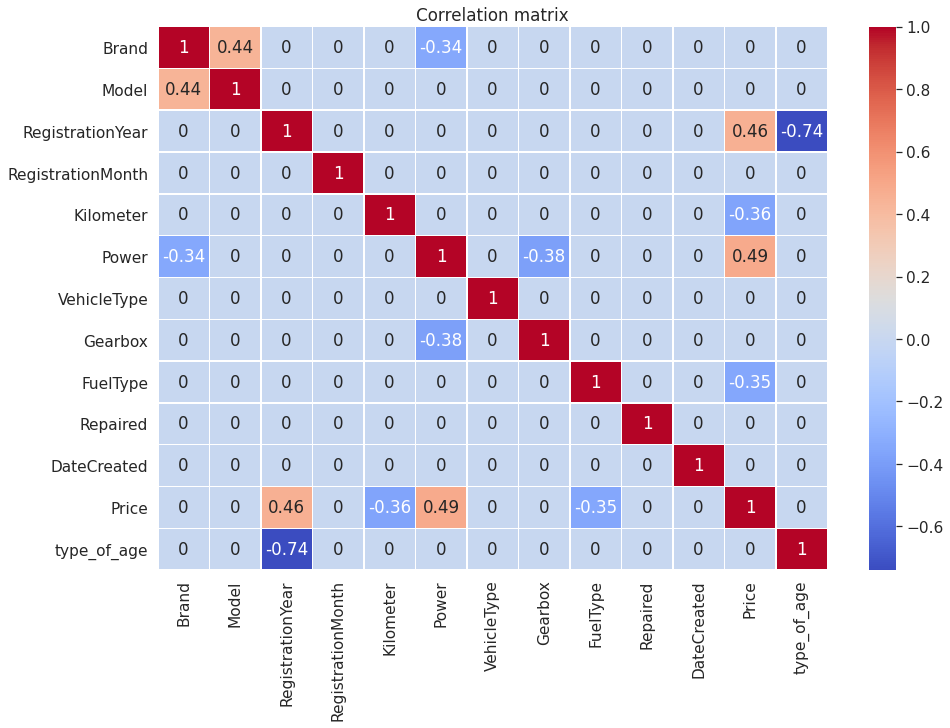

In [103]:
# построим матрицу корреляций
matrix_corr(data_for_corr)

In [106]:
# установим модуль phik
# pip install phik

In [107]:
# Загрузим нужную библиотеку
# import phik

In [109]:
# from phik import resources, report

In [110]:
# получим матрицу корреляции phi_k между всеми переменными
# data.phik_matrix()

In [ ]:
# получим матрицу значимости (выраженную в виде одностороннего Z)
# проверим гипотезы о зависимости каждой пары переменных
# data.significance_matrix()

In [ ]:
# покажем нормализованные остатки каждой пары переменных
# data.outlier_significance_matrices()

### Вывод

В загруженных данных бросаются в глаза неадекватные минимальные и максимальные значения года регистрации, а также мощности автомобиля. Количество фото не заполнено. Средняя стоимость авто составляет 4416, медианное значение 2700.

В пяти полях датафрейма обнаружены пропуски. В поле Model и VehicleType пустые ячейки заполнены значением unknow.  

Для поля Gearbox логика заполнения другая - смотрим модели только с одним типом коробки передач. Принимаем допущение, что исходные данные у нас достаточно полные, и если у модели один тип коробки передач, то и у пропущенных значений Gearbox, аналогиная каробка. Удалось осознанно заполнить 5636 пропусков поля Gearbox. По аналогичным значениям модели. Оставшиеся пропуски заполнили unknow.

Для поля FuelType изучена связь с моделями авто, т.к. некоторые модели могли  быть  только с одним типом топлива. Таким образом удалось заполнить 7 328 пустых ячеек поля FuelType. Остальные ячейки заполняем unknow.

Для поля Repaired  предположили, что машина не была в ремонте при отсутствие данных об этом. 

Количество строк с выбросами в поле год регистрации - 351. Нереальные значения менее 1950 года и более 2022 года. Эти строки удалены, т.к. год выпуска имеет значимую важность при влиянии на цену автомобиля конкретной марки. 

В поле RegistrationMonth выбросов не обнаружено.

Построен график - ящик с усами для пробега - выбросов не обнаружено, только редкие значения, но они допустимы.

Построен график - ящик с усами для мощности, а также диаграмма распределения значений. Обнаружено 47895 выбросов со значениями мощности менее 25 и более 250. Данные строки удалены.

Бесполезнче поля NumberOfPictures, LastSeen, PostalCode, DateCrawled не имеют отношения к стоимости. Они удалены.

Неадекватных значений в поле DateCreated не обнаружено.

Для преобразования данных выберем методику Порядкового кодирования Original Encoding, т.к. планируем дальнейщую работу с моделями основанную на деревьях - дерево решений, случайный лес, градиентный бустинг. Если бы мы работали с линейными моделями можно было бы применить прямое кодирование One Hot Encoding. Но это былобы не удобно, т.к. после преобразования получили бы несколько десятков полей.

Проведена стандартизация данных.

Построена матрица корреляций для определения значимости признаков.

Далее выделен целевой признак, данные разбиты на обучающие, валидационные и тестовые выборки.

## Обучение моделей

### Модель CatBoost

В данном блоке был опробован внутренний метод кодировки данных. Т.е. модель CatBoost работает с категориальными признаками, и не требуем их перевода в дамми-переменные. В принципе, это очень удобно!

In [47]:
# список категориальных и числовых полей
category_columns = ['Brand', 'Model', 'RegistrationYear', 'RegistrationMonth', 
        'VehicleType', 'Gearbox', 'FuelType', 'Repaired', 'DateCreated', 'type_of_age']

numerical_columns = ['Power', 'Kilometer']

In [36]:
# импортируем бибилиотеку
from catboost import CatBoostRegressor

In [48]:
# инициируем модель
catboost_model = CatBoostRegressor(
            loss_function='RMSE',
            n_estimators=125,
            verbose=25,
            cat_features=category_columns  
)

In [49]:
data_features_train.head(2)

,Brand,Model,RegistrationYear,RegistrationMonth,Kilometer,Power,VehicleType,Gearbox,FuelType,Repaired,DateCreated,type_of_age
216143,bmw,3er,2005,0,150000,150,unknow,auto,gasoline,no,2016-03-30 00:00:00,old
179563,peugeot,2_reihe,2002,9,150000,60,small,manual,petrol,no,2016-03-25 00:00:00,old


In [50]:
# обучение модели
catboost_model.fit(data_features_train, data_target_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.5
0:	learn: 3123.0457682	total: 124ms	remaining: 15.3s
25:	learn: 1799.0803848	total: 2.14s	remaining: 8.16s
50:	learn: 1724.1841179	total: 4.1s	remaining: 5.95s
75:	learn: 1690.4699939	total: 6.08s	remaining: 3.92s
100:	learn: 1666.7096056	total: 8.02s	remaining: 1.91s
124:	learn: 1648.4839885	total: 9.95s	remaining: 0us


In [51]:
# оценка модели через кросс-валидацию
cv_score = cross_val_score(catboost_model, 
                data_features_train, 
                data_target_train,
                scoring = 'neg_mean_squared_error',
                cv=5)

Learning rate set to 0.48822
0:	learn: 3143.3806332	total: 100ms	remaining: 12.4s
25:	learn: 1796.3967225	total: 1.79s	remaining: 6.83s
50:	learn: 1724.5124819	total: 3.41s	remaining: 4.95s
75:	learn: 1692.9430936	total: 5.03s	remaining: 3.25s
100:	learn: 1667.6146428	total: 6.64s	remaining: 1.58s
124:	learn: 1648.6642554	total: 8.13s	remaining: 0us
Learning rate set to 0.48822
0:	learn: 3140.1390684	total: 97.2ms	remaining: 12s
25:	learn: 1802.0067234	total: 1.74s	remaining: 6.62s
50:	learn: 1738.3807379	total: 3.31s	remaining: 4.81s
75:	learn: 1692.5168007	total: 4.85s	remaining: 3.13s
100:	learn: 1667.6990872	total: 6.42s	remaining: 1.53s
124:	learn: 1645.0703591	total: 7.93s	remaining: 0us
Learning rate set to 0.48822
0:	learn: 3135.4744018	total: 90.2ms	remaining: 11.2s
25:	learn: 1808.0054422	total: 1.69s	remaining: 6.44s
50:	learn: 1730.7262053	total: 3.3s	remaining: 4.79s
75:	learn: 1697.5413107	total: 4.87s	remaining: 3.14s
100:	learn: 1668.6630107	total: 6.48s	remaining: 1.54

In [52]:
# оценка модели через кросс-валидацию
final_cv_score = round(np.mean(-cv_score)**0.5, 3)
print('RMSE модели через кросс-валидацию', final_cv_score)

RMSE модели через кросс-валидацию 1706.985


In [53]:
# поиск лучших гиперпараметров через GridSearchCV
parameters =[{
    "n_estimators": [100, 250, 500],
    'depth': [4, 10]
}]

model_GSCV = GridSearchCV(
        estimator = CatBoostRegressor(
            loss_function='RMSE',
            verbose=250,
            cat_features=category_columns),   
            param_grid = parameters,
)

In [54]:
# обучение модели
model_GSCV.fit(data_features_train, data_target_train)

Learning rate set to 0.5
0:	learn: 3238.4526776	total: 105ms	remaining: 10.4s
99:	learn: 1761.9212695	total: 4.84s	remaining: 0us
Learning rate set to 0.5
0:	learn: 3236.0034554	total: 72.9ms	remaining: 7.21s
99:	learn: 1758.0022217	total: 4.85s	remaining: 0us
Learning rate set to 0.5
0:	learn: 3231.7475769	total: 71ms	remaining: 7.03s
99:	learn: 1755.7676161	total: 4.63s	remaining: 0us
Learning rate set to 0.5
0:	learn: 3228.4575625	total: 64.9ms	remaining: 6.43s
99:	learn: 1751.0299317	total: 4.61s	remaining: 0us
Learning rate set to 0.5
0:	learn: 3279.0850602	total: 62.7ms	remaining: 6.21s
99:	learn: 1758.7142802	total: 4.69s	remaining: 0us
Learning rate set to 0.277893
0:	learn: 3717.4819919	total: 139ms	remaining: 34.5s
249:	learn: 1705.8659511	total: 29.1s	remaining: 0us
Learning rate set to 0.277893
0:	learn: 3718.5223782	total: 155ms	remaining: 38.6s
249:	learn: 1700.9854108	total: 30.3s	remaining: 0us
Learning rate set to 0.277893
0:	learn: 3718.7984373	total: 154ms	remaining:

GridSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x7faf4044caf0>,
             param_grid=[{'depth': [4, 10], 'n_estimators': [100, 250, 500]}])

In [56]:
# смотрим наилучшие параметры
model_GSCV.best_params_

{'depth': 10, 'n_estimators': 500}

In [57]:
# таблица результатов
pd.DataFrame(model_GSCV.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.495296,0.125658,0.065951,0.001714,4,100,"{'depth': 4, 'n_estimators': 100}",0.842897,0.841048,0.842748,0.839101,0.840711,0.841301,0.001407,6
1,30.897446,0.589439,0.120874,0.004525,4,250,"{'depth': 4, 'n_estimators': 250}",0.852417,0.849709,0.850964,0.846777,0.849940,0.849961,0.001857,5
2,60.180002,0.943964,0.168857,0.005107,4,500,"{'depth': 4, 'n_estimators': 500}",0.853998,0.851056,0.853855,0.849546,0.851657,0.852022,0.001701,4
3,11.517734,0.066512,0.079855,0.001691,10,100,"{'depth': 10, 'n_estimators': 100}",0.861423,0.856579,0.859313,0.856628,0.856704,0.858129,0.001946,3
4,134.099798,1.565512,0.319862,0.013175,10,250,"{'depth': 10, 'n_estimators': 250}",0.869079,0.866677,0.866866,0.864201,0.864366,0.866238,0.001806,2
5,275.804796,2.921472,0.566701,0.036541,10,500,"{'depth': 10, 'n_estimators': 500}",0.871850,0.868361,0.870532,0.865241,0.866882,0.868573,0.002391,1


In [58]:
# реализуем модель с наилучшими параметрами
catboost_model_best = CatBoostRegressor(
            loss_function='RMSE',
            n_estimators=500,
            depth=10,
            verbose=100,
            cat_features=category_columns
)

In [59]:
%%time
# обучим модель
catboost_model_best.fit(data_features_train, data_target_train)

Learning rate set to 0.163852
0:	learn: 3911.0462531	total: 596ms	remaining: 4m 57s
100:	learn: 1565.1374203	total: 1m	remaining: 3m 57s
200:	learn: 1470.4917458	total: 2m 5s	remaining: 3m 6s
300:	learn: 1405.0728957	total: 3m 14s	remaining: 2m 8s
400:	learn: 1355.3951508	total: 4m 22s	remaining: 1m 4s
499:	learn: 1313.4778952	total: 5m 31s	remaining: 0us
CPU times: user 5min 31s, sys: 783 ms, total: 5min 31s
Wall time: 5min 33s


In [60]:
%%time
# получим прогноз для данных valid
pred_valid_catboost_best = catboost_model_best.predict(data_features_valid)

CPU times: user 878 ms, sys: 4 ms, total: 882 ms
Wall time: 879 ms


In [61]:
r2_score(pred_valid_catboost_best, data_target_valid)

0.8539097171540115

In [62]:
print('RMSE', \
      round(mean_squared_error(pred_valid_catboost_best, data_target_valid) ** 0.5, 2))

RMSE 1586.83


### Модель случайного леса

Для модели случайного леса используем закодированные, отмасштабированные данные.

In [111]:
# импортируем библиотеку случайного леса
from sklearn.ensemble import RandomForestRegressor

In [112]:
# инициируем модель
rf_model = RandomForestRegressor(
    random_state=12345,
    n_estimators=50,
    max_depth=10,
    verbose=False
    )

In [122]:
scale_features_train.head()

,Brand,Model,RegistrationYear,RegistrationMonth,Kilometer,Power,VehicleType,Gearbox,FuelType,Repaired,DateCreated,type_of_age
0,-1.420809,-1.403288,0.248716,-1.639771,0.507738,0.764114,0.966667,-2.018861,-1.511551,-0.332136,0.990480,0.274161
1,0.302329,-1.444549,-0.186362,0.851014,0.507738,-1.234114,0.136437,0.399993,0.617258,-0.332136,0.449960,0.274161
2,-0.147185,-1.320767,-0.331388,-0.256001,0.507738,-0.012974,-0.278679,0.399993,0.617258,-0.332136,1.098584,0.274161
3,-1.420809,-1.403288,0.538768,0.020752,0.507738,2.562520,-1.108910,-2.018861,-1.511551,-0.332136,-0.198664,0.274161
4,1.276277,0.040831,-0.476414,-1.086263,0.507738,-0.901076,-0.278679,0.399993,0.617258,3.010814,0.990480,0.274161


In [123]:
%%time
# обучение модели
rf_model.fit(scale_features_train, data_target_train)

CPU times: user 16.1 s, sys: 40 ms, total: 16.2 s
Wall time: 16.2 s


RandomForestRegressor(max_depth=10, n_estimators=50, random_state=12345,
                      verbose=False)

In [124]:
%%time
# прогноз на валидационных данных
pred_scale_target_valid = rf_model.predict(scale_features_valid)

CPU times: user 262 ms, sys: 6 µs, total: 262 ms
Wall time: 260 ms


In [125]:
print('RMSE', \
      round(mean_squared_error(pred_scale_target_valid, data_target_valid) ** 0.5, 2))

RMSE 1898.3


In [126]:
# оценка модели через кросс-валидацию
cv_score_rf = cross_val_score(rf_model, 
                scale_features_train, 
                data_target_train,
                scoring='neg_mean_squared_error',
                              
                cv=5)

In [127]:
final_cv_score_rf = round(np.mean(-cv_score_rf)**0.5, 3)
print('RMSE модели случайного леса через кросс-валидацию', final_cv_score_rf)

RMSE модели случайного леса через кросс-валидацию 1900.806


In [128]:
# Подберем наилучшие параметры для модели случайного леса
parameters =[{

    "n_estimators": [50, 150],
    'max_depth': [4, 10]
}]

model_GSCV_rf = GridSearchCV(
        estimator = RandomForestRegressor(random_state=12345, verbose=50),
        param_grid = parameters,
)
# cv=5, scoring='neg_mean_squared_error'

In [129]:
%%time
# обучим модель
model_GSCV_rf.fit(encod_features_train, data_target_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 50
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
building tree 2 of 50
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
building tree 3 of 50
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
building tree 4 of 50
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
building tree 5 of 50
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s
building tree 6 of 50
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.7s remaining:    0.0s
building tree 7 of 50
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.9s remaining:    0.0s
building tree 8 of 50
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.0s remaining:    0.0s
building tree 9 of 50
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.1s remaining:    0.0s
b

GridSearchCV(estimator=RandomForestRegressor(random_state=12345, verbose=50),
             param_grid=[{'max_depth': [4, 10], 'n_estimators': [50, 150]}])

In [130]:
# лучшие параметры модели
model_GSCV_rf.best_params_

{'max_depth': 10, 'n_estimators': 150}

In [131]:
# таблица результатов
pd.DataFrame(model_GSCV_rf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.986437,0.201857,0.073946,0.004503,4,50,"{'max_depth': 4, 'n_estimators': 50}",0.671272,0.665628,0.680197,0.659275,0.680708,0.671416,0.008299,3
1,18.155548,0.203958,0.186696,0.004501,4,150,"{'max_depth': 4, 'n_estimators': 150}",0.672084,0.665047,0.678085,0.658985,0.680418,0.670924,0.007998,4
2,12.216912,0.516805,0.173632,0.015350,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.820054,0.817004,0.818284,0.813520,0.815449,0.816862,0.002254,2
3,36.786951,0.981866,0.472833,0.016200,10,150,"{'max_depth': 10, 'n_estimators': 150}",0.820382,0.817733,0.818897,0.813722,0.816252,0.817397,0.002284,1


In [132]:
# инициируем модель с лучшими параметрами
rf_model_best = RandomForestRegressor(
    random_state=12345,
    n_estimators=150,
    max_depth=10,
    verbose=False
    )

In [133]:
%%time
# обучение модели
rf_model_best.fit(scale_features_train, data_target_train)

CPU times: user 44.1 s, sys: 16.1 ms, total: 44.2 s
Wall time: 44.2 s


RandomForestRegressor(max_depth=10, n_estimators=150, random_state=12345,
                      verbose=False)

In [134]:
%%time
# прогноз на валидационных данных
pred_scale_target_valid = rf_model_best.predict(scale_features_valid)

CPU times: user 731 ms, sys: 13 µs, total: 731 ms
Wall time: 730 ms


In [135]:
# оценка модели через кросс-валидацию
cv_score_rf = cross_val_score(rf_model_best, 
                scale_features_train, 
                data_target_train,
                scoring='neg_mean_squared_error',                           
                cv=5)

In [136]:
final_cv_score_rf = round(np.mean(-cv_score_rf)**0.5, 3)
print('RMSE модели случайного леса через кросс-валидацию', final_cv_score_rf)

RMSE модели случайного леса через кросс-валидацию 1898.046


### Модель LightGBM

In [137]:
# импортируем библиотеку
import lightgbm as lgb

In [138]:
category_columns

['Brand',
 'Model',
 'RegistrationYear',
 'RegistrationMonth',
 'VehicleType',
 'Gearbox',
 'FuelType',
 'Repaired',
 'DateCreated',
 'type_of_age']

In [139]:
train_dataset = lgb.Dataset(
    encod_features_train, data_target_train,\
    free_raw_data=False
    )

valid_dataset = lgb.Dataset(
    encod_features_valid, data_target_valid,\
    free_raw_data=False
    )

Первый вариант гиперпараметров модели

In [140]:
params = {
    'boosting_type':'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'n_estimators': 10,
    'max_depth': 5,
    'free_raw_data':False,
    'verbose': 10
}

In [141]:
%%time

evals_result = {}
model_lgbm = lgb.train(params,
                    train_set=train_dataset, 
                    valid_sets=(valid_dataset,),
                    evals_result=evals_result,
                    num_boost_round=10)

/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: free_raw_data
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: free_raw_data
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.846372
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.226478
[LightGBM] [Debug] init for col-wise cost 0.003883 seconds, init for row-wise cost 0.090695 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 704
[LightGBM] [Info] Number of data points in the train set: 183183, nu

In [142]:
evals_result

{'valid_0': OrderedDict([('rmse',
               [4161.989844384746,
                3893.955583432706,
                3660.949366590806,
                3457.125159494379,
                3270.4007026617483,
                3108.014830439808,
                2967.137422622376,
                2843.7053139591612,
                2735.130553281014,
                2643.2812771993613])])}

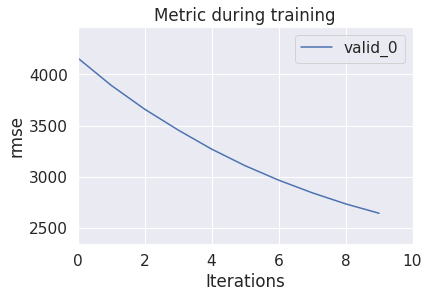

In [143]:
_ = lgb.plot_metric(evals_result)

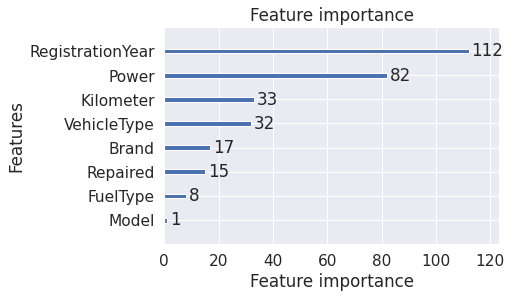

In [144]:
_ = lgb.plot_importance(model_lgbm)

Второй вариант гиперпараметров модели

In [145]:
params_2 = {
    'boosting_type':'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'n_estimators': 75,
    'max_depth': 10,
    'free_raw_data':False,
    'verbose': 10
}

In [146]:
%%time

evals_result_2 = {}
model_lgbm_2 = lgb.train(params_2,
                    train_set=train_dataset, 
                    valid_sets=(valid_dataset,),
                    evals_result=evals_result_2,
                    num_boost_round=10)

[LightGBM] [Warning] Unknown parameter: free_raw_data
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: free_raw_data
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: free_raw_data
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: free_raw_data
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: free_raw_data
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.846372


In [147]:
evals_result_2

{'valid_0': OrderedDict([('rmse',
               [4154.550763742678,
                3879.249832744935,
                3636.9263493942954,
                3427.781557734048,
                3245.8052728729112,
                3084.7062816700177,
                2940.469208732839,
                2818.649561586753,
                2713.9131629615017,
                2616.5861185569856,
                2532.1914390675806,
                2461.418314286876,
                2397.616896890023,
                2343.5862734417656,
                2294.9661148545065,
                2251.219517760192,
                2209.809176834228,
                2175.323591291112,
                2142.1567332611767,
                2115.070888888605,
                2085.1622772571386,
                2061.1876392588338,
                2038.4493208053768,
                2018.3714976531078,
                2000.8552950481926,
                1984.961510227569,
                1968.8115640811066,
      

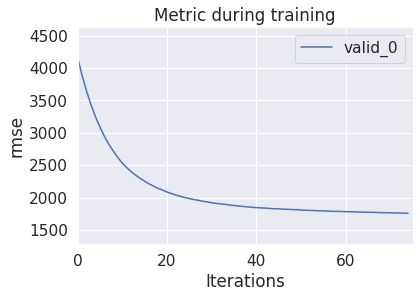

In [148]:
_ = lgb.plot_metric(evals_result_2)

Третий вариант гиперпараметров модели

In [149]:
params_3 = {
    'boosting_type':'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'n_estimators': 150,
    'max_depth': 15,
    'free_raw_data':False,
    'verbose': 10
}

In [150]:
%%time

evals_result_3 = {}
model_lgbm_3 = lgb.train(params_3,
                    train_set=train_dataset, 
                    valid_sets=(valid_dataset,),
                    evals_result=evals_result_3,
                    num_boost_round=10)

[LightGBM] [Warning] Unknown parameter: free_raw_data
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: free_raw_data
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: free_raw_data
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: free_raw_data
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: free_raw_data
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.846372


In [151]:
evals_result_3

{'valid_0': OrderedDict([('rmse',
               [4154.550763742677,
                3879.2498327449343,
                3636.9263493942954,
                3427.7815577340475,
                3245.8052728729112,
                3084.7062816700177,
                2940.4692087328385,
                2818.649561586753,
                2713.9131629615017,
                2616.5861185569856,
                2532.1914390675806,
                2461.418314286876,
                2397.6168968900224,
                2343.5862734417656,
                2294.9661148545065,
                2251.219517760192,
                2209.809176834228,
                2175.323591291112,
                2142.1567332611767,
                2115.0708888886047,
                2085.162277257139,
                2061.1876392588338,
                2038.4493208053768,
                2018.3410650164014,
                2000.7941356105075,
                1984.6549932073522,
                1968.3883695173056,
 

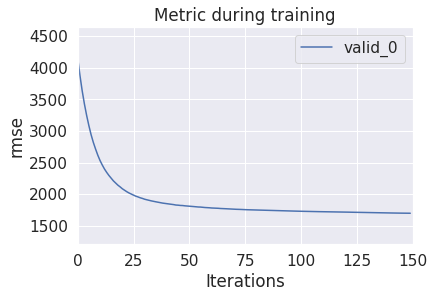

In [152]:
_ = lgb.plot_metric(evals_result_3)

In [153]:
%%time
pred_data_target_valid = model_lgbm_3.predict(encod_features_valid)

CPU times: user 612 ms, sys: 0 ns, total: 612 ms
Wall time: 594 ms


In [154]:
print('RMSE', \
      round(mean_squared_error(pred_data_target_valid, data_target_valid) ** 0.5, 2))

RMSE 1698.07


## Анализ моделей

В качестве наилучшей модели остановимся на LightGBM c гиперпараметрами
    'n_estimators': 150,
    'max_depth': 15,
    
    Время обучения значительно меньше чем у моделей CatBoost и RandomForest
    Время обучения 11секунд
    Время предсказания 540 милисекунд

In [155]:
%%time
# Проверим работу выбранной модели на тестовых данных

pred_data_target_test = model_lgbm_3.predict(encod_features_test)

CPU times: user 593 ms, sys: 6.87 ms, total: 600 ms
Wall time: 585 ms


In [156]:
print('RMSE', \
      round(mean_squared_error(pred_data_target_test, data_target_test) ** 0.5, 2))

RMSE 1733.57


## Выводы

### Выводы по подготовке данных
В загруженных данных бросаются в глаза неадекватные минимальные и максимальные значения года регистрации, а также мощности автомобиля. Количество фото не заполнено. Средняя стоимость авто составляет 4416, медианное значение 2700.

В пяти полях датафрейма обнаружены пропуски. В поле Model и VehicleType пустые ячейки заполнены значением unknow.  

Для поля Gearbox логика заполнения другая - смотрим модели только с одним типом коробки передач. Принимаем допущение, что исходные данные у нас достаточно полные, и если у модели один тип коробки передач, то и у пропущенных значений Gearbox, аналогиная каробка. Удалось осознанно заполнить 5636 пропусков поля Gearbox. По аналогичным значениям модели. Оставшиеся пропуски заполнили unknow.

Для поля FuelType изучена связь с моделями авто, т.к. некоторые модели могли  быть  только с одним типом топлива. Таким образом удалось заполнить 7 328 пустых ячеек поля FuelType. Остальные ячейки заполняем unknow.

Для поля Repaired  предположили, что машина не была в ремонте при отсутствие данных об этом. 

Количество строк с выбросами в поле год регистрации - 351. Нереальные значения менее 1950 года и более 2022 года. Эти строки удалены, т.к. год выпуска имеет значимую важность при влиянии на цену автомобиля конкретной марки. 

В поле RegistrationMonth выбросов не обнаружено.

Построен график - ящик с усами для пробега - выбросов не обнаружено, только редкие значения, но они допустимы.

Построен график - ящик с усами для мощности, а также диаграмма распределения значений. Обнаружено 47895 выбросов со значениями мощности менее 25 и более 250. Данные строки удалены.

Бесполезнче поля NumberOfPictures, LastSeen, PostalCode, DateCrawled не имеют отношения к стоимости. Они удалены.

Неадекватных значений в поле DateCreated не обнаружено.

Для преобразования данных выберем методику Порядкового кодирования Original Encoding, т.к. планируем дальнейщую работу с моделями основанную на деревьях - дерево решений, случайный лес, градиентный бустинг. Если бы мы работали с линейными моделями можно было бы применить прямое кодирование One Hot Encoding. Но это былобы не удобно, т.к. после преобразования получили бы несколько десятков полей.

Проведена стандартизация данных.

Построена матрица корреляций для определения значимости признаков.

Далее выделен целевой признак, данные разбиты на обучающие, валидационные и тестовые выборки.

###### Выводы по обучению моделей
Для сравнения были обучены модели CatBoost, RandomForest и LightGMB. Для каждой модели подготовлены входные данные. На входе CatBoost данные без кодирования, на входе RandomForest и LightGMB данные преобразования по методике Порядкового кодирования Original Encoding. 

Наилучшие параметры из предлаженных для CatBoostRegressor n_estimators=500, depth=10. В результате RMSE по данным параметрам 1586. Время обучения 5min 33s. Время прогноза 879 ms.

Наилучшие параметры из предлаженных для RandomForest n_estimators=150, depth=10. В результате RMSE по данным параметрам 1898. Время обучения 44s. Время прогноза 730 ms.

Наилучшие параметры из предлаженных для LightGBM n_estimators=150, depth=15. В результате RMSE по данным параметрам 1698. Время обучения 7 секунд. Время прогноза 594 ms.
Данная модель имеет рекордно-бустрое время обучения, поэтому именно она и была выбрана в итоге для прогнозирования тестовых значений. 
Финальное значение RMSE для тестового датасета равно 1733.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей